Lab 3: Plotting points
======================
**Goals:**

- using `geopandas` and reading spatial data files
- write functions with parameters and `return` values
- use the apply() function to apply a function to a column
- create interactive maps with GeoPandas


**Topics:**

- format percentages as strings
- plot points on a map
- change the base map
- customize the title and popup
- use colors to represent data
- use radius size to represent data



In [191]:
# import pandas library
import pandas as pd
import geopandas as gpd


# read the data from a URL
# this data combines US cenus data from the ACS with
# UC census tigerline data for place points and land area
url = "https://raw.githubusercontent.com/mcuringa/cartopy/main/notebooks/data/city-points.geojson"


# read the data into a pandas DataFrame
df = gpd.read_file(url)

# display the GeoDataFrame, note the special geometry column
df

,city,state,pop_2022,pop_2017,area,geometry
0,New York,NY,8622467,8560072,300.455595,POINT (-73.93868 40.66271)
1,Los Angeles,CA,3881041,3949776,470.514345,POINT (-118.41082 34.01939)
2,Chicago,IL,2721914,2722586,227.746682,POINT (-87.68494 41.83705)
3,Houston,TX,2296253,2267336,640.602800,POINT (-95.38881 29.78574)
4,Phoenix,AZ,1609456,1574421,518.327625,POINT (-112.09013 33.57215)
...,...,...,...,...,...,...
334,San Tan Valley,AZ,101207,90665,75.792311,POINT (-111.56282 33.17859)
335,Quincy,MA,100981,93824,16.572565,POINT (-71.00899 42.26101)
336,Edinburg,TX,100964,86123,44.722438,POINT (-98.16284 26.32106)
337,Lynn,MA,100653,93069,10.738836,POINT (-70.96203 42.47477)


<Axes: >

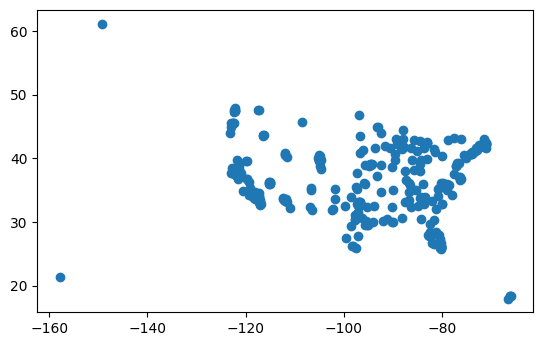

In [192]:
# use plot() to make a static map

df.plot()

In [193]:
# use explore() to make an interactive map
df.explore()

In [194]:
# calculate the 5 year change in population
# calculate the 5 year change in percent of population
# write a function to format a real number as a percentage


# first, some very simple functions

def times2(n):
    print("running times2")
    print(f"the number is {n}")
    return n * 2


# print("calling times2(4)", times2(4))
# print("calling times2(8)", times2(8))
# print("calling times2(16)", times2(16))

def power(base, exp):
    return base**exp

# power(10, -1)

# now that string formatting function

# use apply() to map the function to a column

def fmt_number(n):
    return f"{n:,.2f}"

df["density"] = df.pop_2022 / df["area"]
df[["city", "pop_2022", "density"]]

table = df.sort_values(by="density", ascending=False).head(20).copy()
table["density_pp"] = table.density.apply(fmt_number)
table[["city", "density"]]

table.density_pp
table



,city,state,pop_2022,pop_2017,area,geometry,density,density_pp
0,New York,NY,8622467,8560072,300.455595,POINT (-73.93868 40.66271),28697.974533,"28,697.97"
73,Jersey City,NJ,287899,265932,14.747956,POINT (-74.06476 40.71142),19521.282090,"19,521.28"
169,Paterson,NJ,157864,147890,8.413162,POINT (-74.16283 40.91477),18763.932358,"18,763.93"
253,Cambridge,MA,117962,110893,6.396859,POINT (-71.11868 42.37604),18440.613228,"18,440.61"
16,San Francisco,CA,851036,864263,46.699439,POINT (-123.03223 37.72724),18223.687713,"18,223.69"
255,East Los Angeles,CA,117222,123905,7.453105,POINT (-118.16857 34.03151),15727.942597,"15,727.94"
23,Boston,MA,665945,669158,48.339976,POINT (-71.01825 42.33855),13776.278972,"13,776.28"
323,Daly City,CA,103648,106480,7.638415,POINT (-122.46867 37.68619),13569.306994,"13,569.31"
66,Newark,NJ,307355,282803,24.143368,POINT (-74.17257 40.72422),12730.411030,"12,730.41"
43,Miami,FL,443665,443007,35.995486,POINT (-80.20862 25.77516),12325.573264,"12,325.57"


In [201]:
# create a new column for the mouseover tooltip label
# use apply() for the whole row with axis=1

# turn of the extra label with tooltip_kwds={"labels": False}

def make_tooltip(row):
    return f"{row.city} (pop. {row.pop_2022:,})"

df["tooltip"] = df.apply(make_tooltip, axis=1)

df.explore(tooltip=None, popup=["city", "state"], popup_kwds={"labels": False})



In [196]:
# onclick popups

df.explore(tooltip="tooltip", tooltip_kwds={"labels": False}, popup=["city", "state"])


In [197]:
# get the packages we need to change the tiles/base map
# xyz has the data on the providers, we use it to build the URL and attribution
import xyzservices.providers as xyz

# change the basemap to use the CartoDB DarkMatterNoLabels tiles

# df.explore(tiles=xyz.CartoDB.DarkMatterNoLabels, attr=xyz.CartoDB.DarkMatterNoLabels)

# divide the cities into small, medium, and large
small = df[df.pop_2022 < 500_000]
medium = df[(df.pop_2022 >= 500_000) & (df.pop_2022 <=1_000_000)]
large = df[df.pop_2022 > 1_000_000]


# plot them on the same map, with different colors and radius size
# note: you can use any hex color or HTML named color
# see: https://developer.mozilla.org/en-US/docs/Web/CSS/named-color

m = small.explore(tiles=xyz.CartoDB.DarkMatterNoLabels,
                  attr=xyz.CartoDB.DarkMatterNoLabels,
                  color="blue", style_kwds={"radius": 5}, tooltip="tooltip", tooltip_kwds={"labels": False})
m = medium.explore(m=m, color="green", style_kwds={"radius": 7}, tooltip="tooltip", tooltip_kwds={"labels": False})
m = large.explore(m=m,color="red", style_kwds={"radius": 10}, tooltip="tooltip", tooltip_kwds={"labels": False})

m

<hr>

Tile Providers
==============
There are many different basemap tile providers
that can work with `geopandas` and `folium`.
Below we present our data with a few of them.
OpenStreetMap is the default tile provider.
CartoDB provides a good set of tiles, that have
"labels" and "no label" options.

[**You can find a gallery of tile providers here.**](https://xyzservices.readthedocs.io/en/stable/gallery.html)


In [198]:
# list all of the base map options for explore()
# import these to make nicer descriptions for the maps
from IPython.display import display, HTML

# xyz has the data on the providers, we use it to build the URL and attribution
import xyzservices.providers as xyz

# these are a few of the selected tiles
tiles = [xyz.OpenStreetMap.Mapnik, xyz.CartoDB.Positron, xyz.CartoDB.PositronNoLabels,
         xyz.CartoDB.DarkMatter, xyz.CartoDB.DarkMatterNoLabels,
         xyz.CartoDB.Voyager, xyz.USGS.USImageryTopo,
         xyz.USGS.USImagery, xyz.USGS.USTopo, xyz.OpenTopoMap]


for provider in tiles:
    display(HTML(f"<h2>{provider.name}</h2>"))
    display(HTML(
        f"""<tt>df.explore(tiles=xyz.{provider.name}.url, attr=xyz.{provider.name}.attribution)</tt>"""))
    display(HTML(provider.html_attribution))
    display(df.explore(tiles=provider, attr=provider))

In [199]:
show_tile(tiles[1])

NameError: name 'show_tile' is not defined

In [9]:
show_tile(tiles[2])

In [10]:
show_tile(tiles[3])

In [11]:
show_tile(tiles[4])

In [12]:
show_tile(tiles[5])

In [13]:
show_tile(tiles[6])